
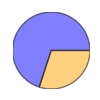

In [13]:
import folium
from folium.features import CustomIcon
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import numpy as np
from PIL import Image
import io
import base64

# Функция для создания процентного круга
def create_percentage_circle(percentage, color1='green', color2='red', alpha=0.5, size=(100, 100)):
    fig, ax = plt.subplots(figsize=(1, 1), dpi=100)
    fig.patch.set_alpha(0)  # Делаем фон прозрачным
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')

    # Рисуем первый сектор
    angle1 = 0
    angle2 = percentage * 3.6
    wedge1 = Wedge((0, 0), 1, angle1, angle2, facecolor=color1, edgecolor='black', alpha=alpha)
    ax.add_patch(wedge1)

    # Рисуем второй сектор
    angle1 = percentage * 3.6
    angle2 = 360
    wedge2 = Wedge((0, 0), 1, angle1, angle2, facecolor=color2, edgecolor='black', alpha=alpha)
    ax.add_patch(wedge2)

    # Преобразуем график в изображение
    fig.canvas.draw()
    image = np.array(fig.canvas.renderer.buffer_rgba())
    plt.close(fig)
    return image

# Функция для преобразования изображения в base64
def image_to_base64(image_array):
    img = Image.fromarray(image_array)
    buffered = io.BytesIO()  # Создаем байтовый поток
    img.save(buffered, format="PNG")  # Сохраняем изображение в поток в формате PNG
    img_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")  # Кодируем в base64
    return img_base64

# Создаем карту
m = folium.Map(location=[55.7558, 37.6176], zoom_start=10)

# Добавляем различные слои карты
base_maps = {
    "OpenStreetMap": folium.TileLayer("OpenStreetMap"),
    "CartoDB Positron": folium.TileLayer("CartoDB Positron"),
    "CartoDB Dark_Matter": folium.TileLayer("CartoDB Dark_Matter")
}

# Добавляем слои на карту
for name, layer in base_maps.items():
    layer.add_to(m)

# Создаем процентный круг
percentage = 70  # Например, 70%
image_array = create_percentage_circle(percentage, color1='blue', color2='orange', alpha=0.5)

# Преобразуем изображение в base64
img_base64 = image_to_base64(image_array)

# Создаем пользовательскую иконку с использованием base64
icon = CustomIcon(
    icon_image=f"data:image/png;base64,{img_base64}",  # Используем base64 для иконки
    icon_size=(50, 50)
)

# Добавляем маркер с изображением на карту
marker = folium.Marker(
    location=[55.7558, 37.6176],  # Координаты поселения
    icon=icon,
    popup=f"Процент: {percentage}%"
)

# Добавляем маркер в отдельный слой
feature_group = folium.FeatureGroup(name="Percentage Markers")
marker.add_to(feature_group)
feature_group.add_to(m)

# Добавляем LayerControl для управления слоями
folium.LayerControl().add_to(m)

# Отображаем карту
display(m)